In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('music.csv', encoding='latin1')

In [3]:
df.head()

,id,artist_name,track_name,popularity,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained,valence,music
0,32894.0,RÃ¶yksopp,RÃ¶yksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,04-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,04-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,04-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,04-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,04-Apr,0.323,Electronic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration          50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained          50000 non-null  object 
 16  valence           50000 non-null  float6

In [5]:
columns_to_drop = [
    'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'movement/places',
    'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness',
    'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness',
    'valence', 'energy', 'topic', 'age','popularity','duration','liveness','speechiness','tempo','obtained',
]

# Filter the columns that actually exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the selected columns
df.drop(columns=columns_to_drop, inplace=True)


In [6]:
df.head()

,id,artist_name,track_name,key,mode,music
0,32894.0,RÃ¶yksopp,RÃ¶yksopp's Night Out,A#,Minor,Electronic
1,46652.0,Thievery Corporation,The Shining Path,D,Minor,Electronic
2,30097.0,Dillon Francis,Hurricane,G#,Major,Electronic
3,62177.0,Dubloadz,Nitro,C#,Major,Electronic
4,24907.0,What So Not,Divide & Conquer,F#,Major,Electronic


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  float64
 1   artist_name  50000 non-null  object 
 2   track_name   50000 non-null  object 
 3   key          50000 non-null  object 
 4   mode         50000 non-null  object 
 5   music        50000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [8]:
df.duplicated().sum()

4

In [9]:
df.shape

(50005, 6)

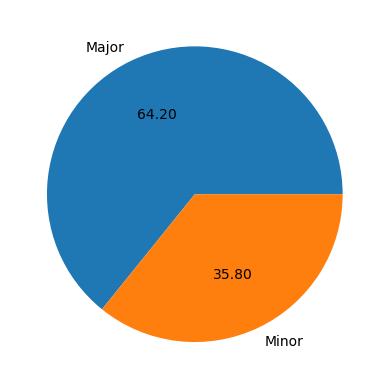

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['mode'].value_counts(),labels=['Major','Minor'],autopct="%0.2f")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['mode']=encoder.fit_transform(df['mode'])

In [13]:
df.head(5)

,id,artist_name,track_name,key,mode,music
0,32894.0,RÃ¶yksopp,RÃ¶yksopp's Night Out,A#,1,Electronic
1,46652.0,Thievery Corporation,The Shining Path,D,1,Electronic
2,30097.0,Dillon Francis,Hurricane,G#,0,Electronic
3,62177.0,Dubloadz,Nitro,C#,0,Electronic
4,24907.0,What So Not,Divide & Conquer,F#,0,Electronic


In [14]:
df.isnull().sum()

id             5
artist_name    5
track_name     5
key            5
mode           0
music          5
dtype: int64

In [15]:
import seaborn as sns

<Axes: ylabel='Count'>

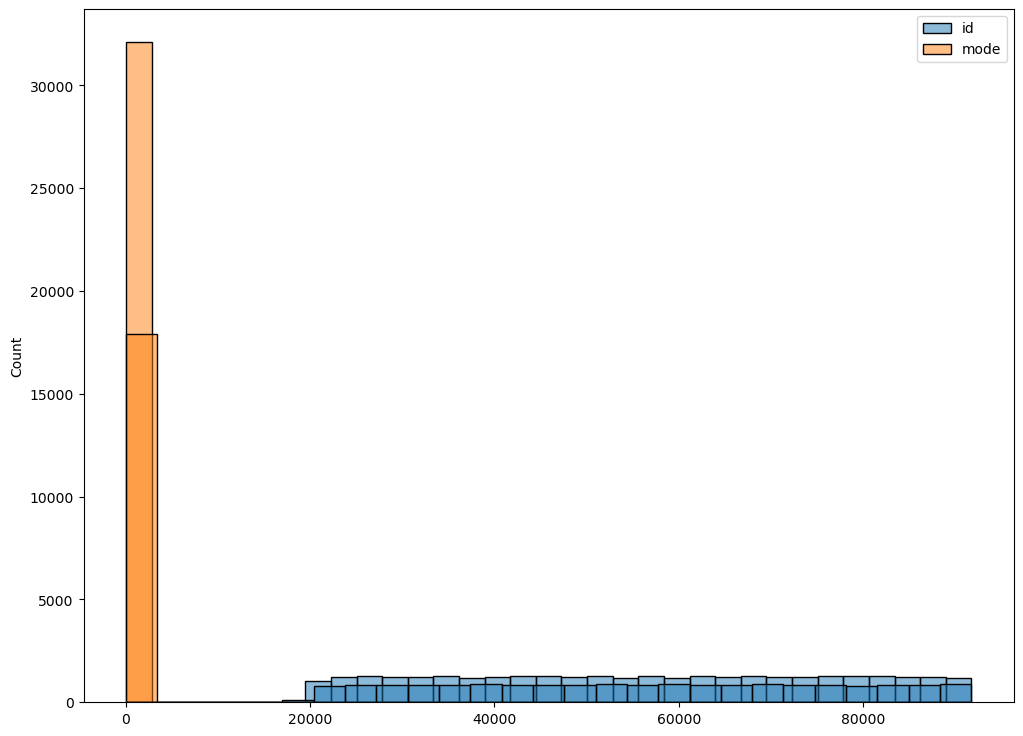

In [16]:
plt.figure(figsize=(12,9))
sns.histplot(df[df['mode']==0])
sns.histplot(df[df['mode']==1],color='red')

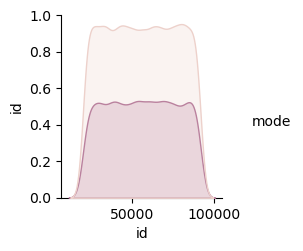

In [17]:
sns.pairplot(df,hue='mode')

C:\Users\acer\AppData\Local\Temp\ipykernel_9360\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

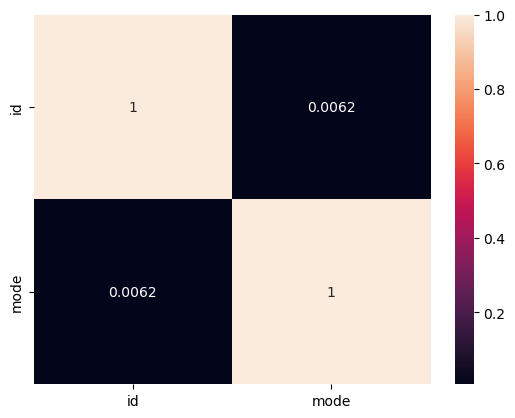

In [18]:
sns.heatmap(df.corr(),annot=True)

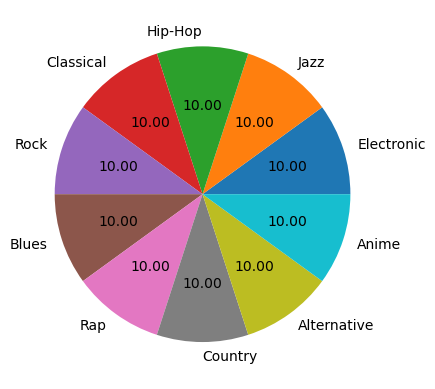

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['music'].value_counts(),labels=['Electronic','Jazz','Hip-Hop','Classical','Rock','Blues','Rap','Country',
                                             'Alternative','Anime'],autopct="%0.2f")
plt.show()